# Homework Assignment 3 (Individual)

---

Spencer Pachavis Section 1


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


Animal_Agent: initializes an animal with several characteristics including, type(predator/prey), age limit, mate limit, etc. which are all characteristics we will use in the environment.  Animals of this class can move around, are assigned color based on genes, they can age/die, hunt, find distance between other animals, and they can procreate.  Using these, you can draw the animals, and where they are in an environment based on time and show the change over a period.

Environment: creates an environment for an agent-based model to occur in.  Sets the boundaries of the size of the environment, it can add agents (animals) into the environment, it simulates a time stamp going over a list of all the agents in the environment and removing/adding animals that have been born, hunted, or died of age, you can also plot the population levels of the environment over time.  This is the base for the ABM and can be used as a visualization to show the animals in the envirnoment.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

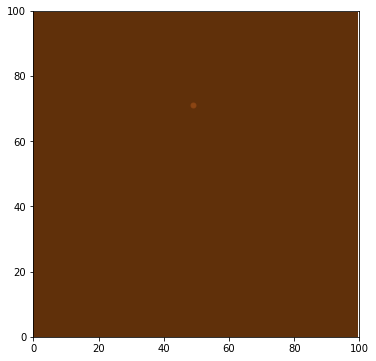

In [149]:
#Write your code here
import random
from Animal_Agent_Class import Animal_Agent
import Environment
import numpy as np

environment = Environment.Environment()
animal1 = Animal_Agent_Class.Animal_Agent(sex = 'F')

environment.add_agent(animal1)
environment.simulate(10)

In the procreate function of the Environment object, the time and list parameters of animals were flipped.  This meant that they were trying to iterate through an integer and subtracta a list since they two items were being input in the wrong order, but it was an easy fix to just flip them.

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


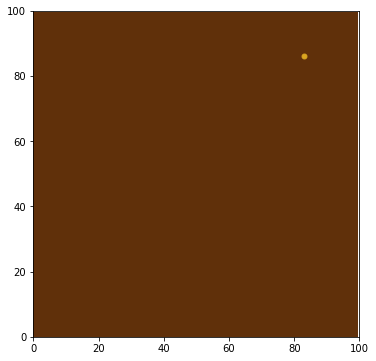

In [155]:
#Write your code here
environment = Environment.Environment()
animal1 = Animal_Agent_Class.Animal_Agent(sex = 'F')

environment.add_agent(animal1)

animal1.set_allele(random.randint(0,1),random.randint(0,1))

environment.simulate(10)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

In [158]:
#Write your code here
environment = Environment.Environment()
animal1 = Animal_Agent_Class.Animal_Agent(sex = 'F')
environment.add_agent(animal1)
animal1.set_allele(random.randint(0,1),random.randint(0,1))


pred1 = Animal_Agent_Class.Animal_Agent(ptype='Predator', shape = 'P', color = 'red')
environment.add_agent(pred1)

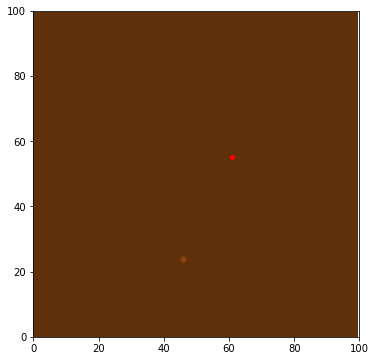

In [159]:
environment.simulate(50)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

In [160]:
#Write your code here
def add_prey():
    
    num = random.randint(0,1)
    if num == 1:
        sex = 'F'
    else:
        sex = 'M'
        
    animal = Animal_Agent_Class.Animal_Agent(sex = sex)
    animal.set_allele(random.randint(0,1),random.randint(0,1))

    environment.add_agent(animal)

def add_predator():
    
    pred = Animal_Agent_Class.Animal_Agent(ptype='Predator', shape = 'P', color = 'red')
    
    environment.add_agent(pred)
        

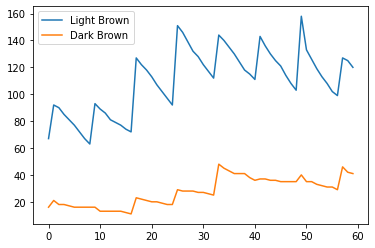

In [165]:
environment = Environment.Environment()

for i in range(0,90):
    
    add_prey()
    
    if i < 7:
        add_predator()

environment.simulate_plot_populations(60)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The population appears to be periodic on the graph.  One factor that affects this is that procreation requires that a certain time has passed by until the animals can repopulate, so the increasing periods come from this.  The decreasing comes from animals dieing off of old age and from being hunted which is what causes the decreasing periods of the population plots.  The light brown initial population typically makes up about 2/3 of the population since the gene for this color is recessive, and less likely to occur for the animals.  The increasing and decreasing population rates do not seem to differ from one another for the separate colors, just the quantity because there are a lot more light brown prey.

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [166]:
#Write your code here
class Mouse(Animal_Agent):
    
    def __init(self):
        
        super().__init__(self)
    
    def set_allele(self, alle_d, alle_m):
        '''
        Method to set the alleles of this mouse: alle_d and alle_m from dad and mom, respectively.
        The values is either 0 or 1 for each allele. 
        0 and 1 are recessive and dominant gene expressions, respectively.
        This setup will result in three types of fur_color expressions: 
        type0 ==> (0,0): 0 = 0 + 0; recessive, dark color
        type1 ==> (0,1) or (1,0): 1 = 0 + 1 = 1 + 0; dominant, light color
        type2 ==> (1,1): 2 = 1 + 1; dominant, light color
        '''

        self.alle_d = alle_d
        self.alle_m = alle_m

        # Here we set light animal color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95

        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05
            
    
    def procreate(self,all_agents,time):
        '''
        Method to create new agents (procreate). There are three barriers to procreation:
        1. Has it been enough time between the last procreation? (I.e., more than the gestation time.)
        2. Is there a (male) agent within range?
        3. Is the population below the saturation point? This is modeled as a logistic function.
        If all of these conditions are met, then a new litter is created. Every member of the new litter is 
        randomly assigned genes from their parents. The last litter time is set to the current time and the
        list of children is returned. 

        all_agents (list): A list of all of the animal agent objects 
        time (int): The current time, used to determine if the Animal Agent has passed the gestation period.
        '''
        
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time-self.last_litter_time),self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype=="Prey") and (agent.sex == "M") and (self.get_distance(agent) <= self.mate_range) and (val > (1.0/(1.0+np.exp(-len(all_agents)/self.saturation_pop)))):
                    child_num = int(np.random.normal(7,1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0,2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0,2) == 1:
                            dad_a = agent.alle_m               
                        child = Mouse(sex="F")
                        if np.random.randint(0,2) == 1:
                            child = Mouse(sex="M")
                        child.set_allele(dad_a,mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break
                    
        return child_list

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [167]:
#Write your code here
class Hawk(Animal_Agent):
    
    def __init(self):

        super().__init__(self)
        
    def hunt(self,all_agents):
        '''
        Method for a predator to find prey. If the predator finds prey, the method sets the is_caught flag 
        and returns the prey object so it can be removed from the environment. 


        all_agents (list): A list of all of the animal agent objects 
        '''
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if self.get_distance(agent) < self.catch_radius:
                    num = random.random()
                    if num < agent.catch_probability:
                    
                        agent.is_caught = True
                        return agent       
        return False

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

In [168]:
#Write your code here
def add_mouse():
    
    num = random.randint(0,1)
    if num == 1:
        sex = 'F'
    else:
        sex = 'M'
        
    mouse = Mouse(sex = sex)
    mouse.set_allele(random.randint(0,1),random.randint(0,1))

    environment.add_agent(mouse)
    

def add_hawk():
    
    hawk = Hawk(ptype='Predator', shape = 'P', color = 'red')
    
    environment.add_agent(hawk)
        

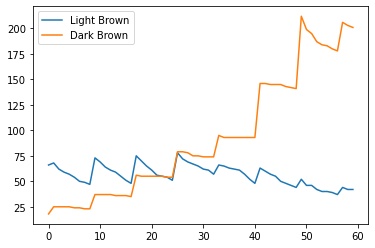

In [173]:
environment = Environment.Environment()

for i in range(0,90):
    
    add_mouse()
    
    if i < 7:
        add_hawk()

environment.simulate_plot_populations(60)

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

The large difference here is that you see a lot less death amongst the dark brown mice, so the population growth is a lot higher which correlates to them having a lower catch probability.  They both still have death from aging and being caught to an extent, but light brown mice die a lot more frequently because of the catch probability and they are more easily hunted.  This is an example of natural selection since the dark brown genes cause the dark brown mice to not be hunted as much while the light brown are hunted a lot more easily, and eventually you see there are very few light brown mice left even though they started with a higher population, and you see dark brown mice being a lot more represented in the population.

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.